Text(0, 0.5, 'bytes')

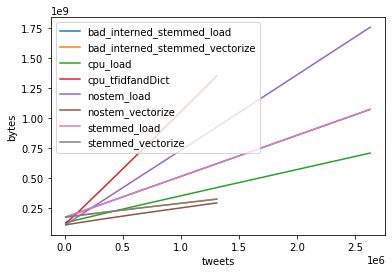

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

filenames = !ls ../results/*measure.csv

measures = {os.path.basename(name).replace('_measure.csv', ''): pd.read_csv(name) for name in filenames}

for mes in measures.keys():
    plt.plot(measures[mes]['tweets'], measures[mes]['mem'], label=mes)
plt.legend()
plt.xlabel('tweets')
plt.ylabel('bytes')
# stemmed load == bad interned stemmed load
# stemmed vectorize == bad interned stemmed vectorized

Text(0, 0.5, 'bytes')

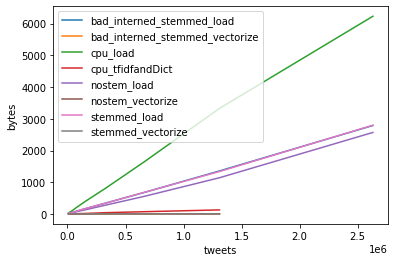

In [3]:
for mes in measures.keys():
    plt.plot(measures[mes]['tweets'], measures[mes]['time'], label=mes)
plt.legend()
plt.xlabel('tweets')
plt.ylabel('bytes')


In [2]:
# Vocabulary should not be increasing linearly! this is not what I was promised
# mem increases linearly in function of cols/tweets ... as if each tweet is adding at least one new, unique word not found in any other tweet: URLs!?
# what's gonna help: stemming, filter dictionary?
